In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import warnings 

warnings.filterwarnings("ignore") 

In [6]:
haberman = pd.read_csv("haberman.csv")

In [7]:
#Q. How many Data Points and Features?
haberman.shape

(306, 4)

In [8]:
#Q. How is the data distributed?
haberman.describe()

,Age,Year of Op,Number of Positive Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [31]:
haberman.median()

Age                         52.0
Year of Op                  63.0
Number of Positive Nodes     1.0
Survival Status              1.0
dtype: float64

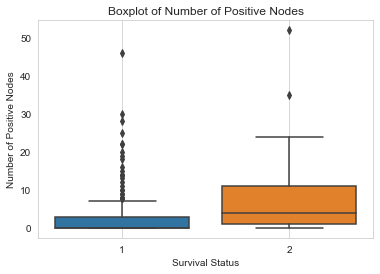

In [102]:
sns.boxplot(x = 'Survival Status', y = 'Number of Positive Nodes', data = haberman)
plt.grid()
plt.title("Boxplot of Number of Positive Nodes")
plt.show()

In [21]:
Survival_counts = haberman["Survival Status"].value_counts()
year_counts = haberman["Year of Op"].value_counts()

In [26]:
year_counts
#Data Points per class for Year of Op

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year of Op, dtype: int64

In [30]:
Survival_counts
#Data Points per class for Survival Status

1    225
2     81
Name: Survival Status, dtype: int64

In [11]:
print(haberman.columns)

Index(['Age', 'Year of Op', 'Number of Positive Nodes', 'Survival Status'], dtype='object')


In [ ]:
#Objective: To predict whether the patient will survive after 5 years or not based upon the patient's age, 
#year of treatment and the number of positive nodes

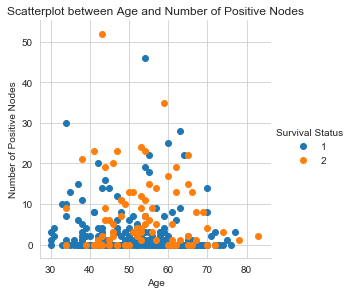

In [103]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival Status", size=4) \
   .map(plt.scatter, "Age", "Number of Positive Nodes") \
   .add_legend();
plt.title("Scatterplot between Age and Number of Positive Nodes")
plt.show();

As we can see from the graph we cannot separate the two classes 1 and 2 linearly.

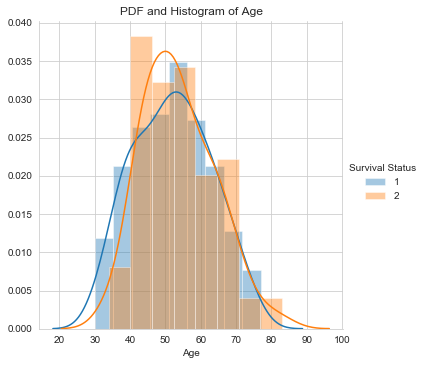

In [96]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("PDF and Histogram of Age")
plt.show();

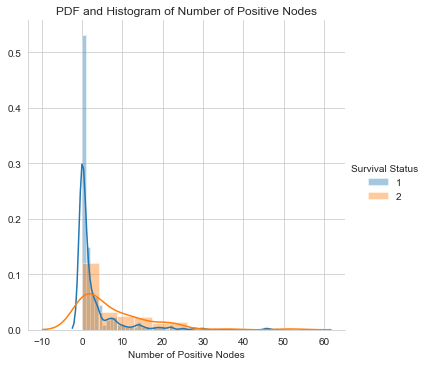

In [97]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Number of Positive Nodes") \
   .add_legend();
plt.title("PDF and Histogram of Number of Positive Nodes")
plt.show();

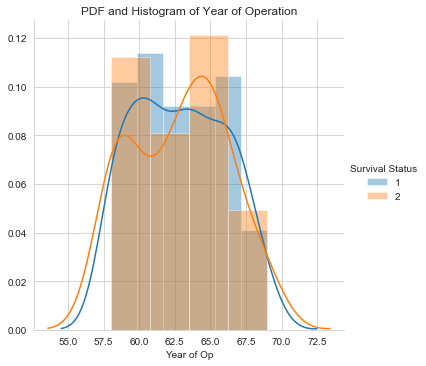

In [95]:
sns.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sns.distplot, "Year of Op") \
   .add_legend();
plt.title("PDF and Histogram of Year of Operation")
plt.show();

All three graphs are linearly inseparable because most of the data is coinciding with each other.

Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


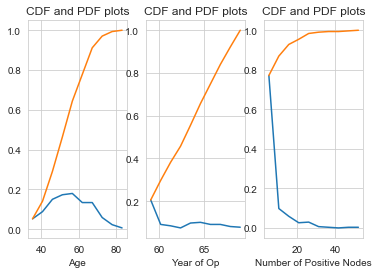

In [80]:
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    counts, bin_edges = np.histogram(haberman[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.title("CDF and PDF plots")
#Source: https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis#4.-Objective

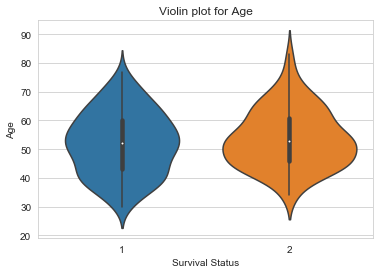

In [83]:
#Violin Plots
sns.violinplot(x="Survival Status", y="Age", data=haberman, size=8)
plt.title("Violin plot for Age")
plt.show()

In [82]:
sns.violinplot?

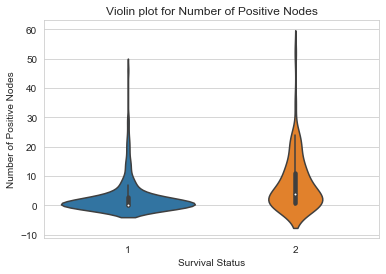

In [94]:
sns.violinplot(x="Survival Status", y="Number of Positive Nodes", data=haberman, size=8)
plt.title("Violin plot for Number of Positive Nodes")
plt.show()

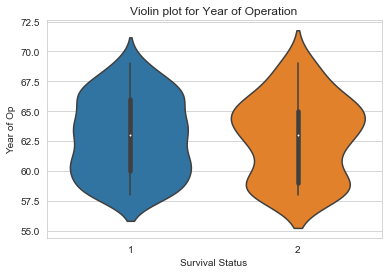

In [75]:
sns.violinplot(x="Survival Status", y="Year of Op", data=haberman, size=8)
plt.title("Violin plot for Year of Operation")
plt.show()

All three violin plots also have the same ranges.

In [57]:
haberman_indep=haberman[['Age', 'Year of Op', 'Number of Positive Nodes']]

In [58]:
haberman_indep.head()

,Age,Year of Op,Number of Positive Nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


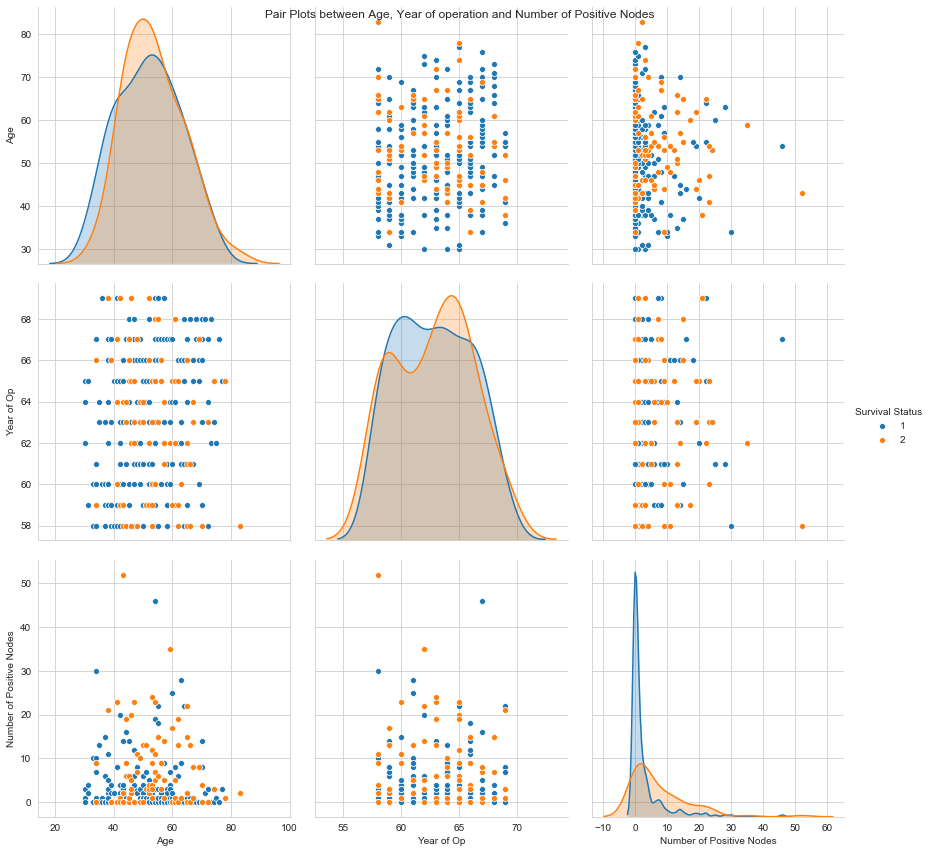

In [101]:
#Pair Plots
g = sns.pairplot(haberman, hue="Survival Status",vars=["Age", "Year of Op", "Number of Positive Nodes"], size=4);
g.fig.suptitle("Pair Plots between Age, Year of operation and Number of Positive Nodes")
plt.show()

Only 3 plots are actually valid in these pair plots. They are between year of Op, Number of positive Nodes and Age.
None of those three plots are linearly separable.

Observations:
1. The dataset has 306 records
2. Number of positive lymph nodes has mean = 4.026 but median = 1.00. From the boxplot we can observe that there are lots of outliers for Number of positive lymph nodes, which is the reason why mean is has become distorted.
3. None of the graphs are giving an exact distinction between the Survival Status
4. Separating the survival status is hence harder in EDA process for this dataset.